## **Note: Both parts of lab 8 task are included in this notebook.**

# **LAB 8 Task: PART 1**

In [1]:
import numpy as np 
import pandas as pd 
from sklearn import decomposition
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Telcom Customer Churn Dataset
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

In [2]:
df = pd.read_csv("data.csv")

## **EDA**

### **Printing Data**

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Printing Shape**

In [4]:
df.shape

(7043, 21)

### **Checking data types**

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### **Describing data**

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### **Droping Irrelevent coloumns**

customerID doesn't make any sense to me so I just dropped for this instance.

In [7]:
df = df.drop(['customerID'], axis=1)
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Changing Catagorial data to binary encoding**

In [8]:
gender_map = {"Female" : 0, "Male": 1}
yes_no_map = {"Yes" : 1, "No" : 0}

def binary_encode(features):
    for feature in features:
        df[feature] = df[feature].map(yes_no_map)
        
df["gender"] = df["gender"].map(gender_map)

categorical_features = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
binary_encode(categorical_features)

In [9]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


### **converting object data to numeric**

In [10]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

In [11]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

### **Check for null values**

In [12]:
df.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

### **Dealing with null values**

In [13]:
df["TotalCharges"].isnull().sum()

11

In [14]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)

In [15]:
df.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

### **Replacing Catagorial data with more than 2 classes with one hot encoding**

In [16]:
df = pd.get_dummies(df)

In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


### **Checking all data is numeric**

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.000,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.000,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.000,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.000,1.00,1.00,1.00
PaperlessBilling,7043.0,0.592219,0.491457,0.00,0.000,1.00,1.00,1.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.000,0.00,1.00,1.00


## Train_Test Split

In [19]:
X = df.drop('Churn',axis = 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

## **Naive Bayes Classifier**

In [20]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

DecisionTreeClassifier

model.fit(X_train,y_train)
predicted= model.predict(X_test)


NameError: name 'DecisionTreeClassifier' is not defined

### **Accuracy**

In [ ]:
predicted= model.predict(X_test)
accuracy = metrics.accuracy_score(y_test,predicted)
print('Accuracy Using Gaussion Based Naive Bayes Classifier= ' + str(accuracy))

## **5-Fold Cross Validation**

In [21]:
model = GaussianNB()
scores = cross_val_score(model, X_train,y_train,cv=5)
print("cross-validation scores: ", scores)
print ("Mean Cross-validation score: ", scores.mean())

cross-validation scores:  [0.71050142 0.72374645 0.68087121 0.67897727 0.67613636]
Mean Cross-validation score:  0.6940465439637624


## **Grid Search**

In [22]:
param_grid = {'var_smoothing' : [1e-09, 1e-10, 1e-08,1e-11]}

model = GaussianNB()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Best Parameters: ' + str(grid_search.best_params_))
print('Best Scores: ' + str(grid_search.best_score_))

print('Prediction Score: ' + str(grid_search.score(X_test, y_test)))

Best Parameters: {'var_smoothing': 1e-10}
Best Scores: 0.6940467231444052
Prediction Score: 0.7047132311186826


# **LAB 8 Task: PART 2**

### **Scaling test and training data**

In [23]:
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

### **Finding number of principle components**

14 principle components cover less than 90% variance. Therefore, selecting 15 as the number of principle components. 

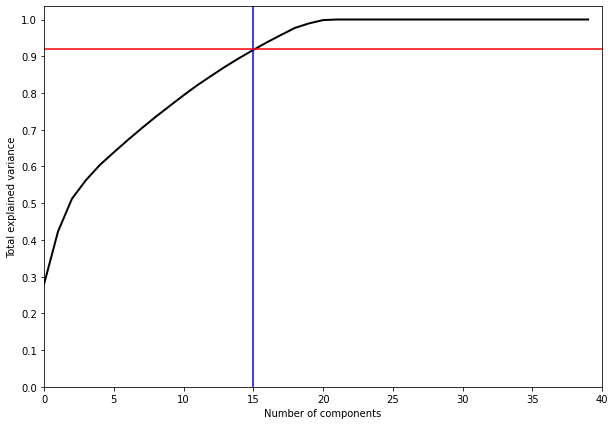

In [24]:
pca = decomposition.PCA().fit(X_train_scaled)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 40)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(15, c='b')
plt.axhline(0.92, c='r')
plt.show()

### **PCA with components =15**

In [25]:
pca = decomposition.PCA(n_components=15)
X_train_pca_scaled = pca.fit_transform(X_train_scaled)
X_test_pca_scaled = pca.fit_transform(X_test_scaled)


### **5-Fold cross validation using PCA**

In [26]:
model = GaussianNB()
scores = cross_val_score(model, X_train_pca_scaled,y_train,cv=5)
print("cross-validation scores: ", scores)
print ("Mean Cross-validation score: ", scores.mean())

cross-validation scores:  [0.77578051 0.78524125 0.77840909 0.77556818 0.75284091]
Mean Cross-validation score:  0.7735679883030876


### **Grid Search with PCA**

In [27]:
param_grid = {'var_smoothing' : [1e-09, 1e-10, 1e-08,1e-11]}

model = GaussianNB()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_pca_scaled, y_train)

print('Best Parameters: ' + str(grid_search.best_params_))
print('Best Scores: ' + str(grid_search.best_score_))

print('Prediction Score: ' + str(grid_search.score(X_test_pca_scaled, y_test)))

Best Parameters: {'var_smoothing': 1e-09}
Best Scores: 0.7735679883030876
Prediction Score: 0.7535491198182851


# **Conclusion**

* **Preprocessing:**
The original data has only 3 numeric features and others were catagorial features. We have to replace the catagorial features with binary encoding or one hot encoding so that our model can use these features. We also droped the ID coloumn of the data as it dosent provide any information related to class label. 

* **Results Comparison:**
For this dataset, the accuracy of model trained on features extracted by principle component analysis is grater than the model trained on original dataset after preprocessing. Normaly the result of model trained on data after PCA lag behind the results of model trained on originat data, but this trend dosent seems to follow in our case. There can be multiple reasons for this some of which are listged below:
    * Most of the features were catagorial. 
    * Converting catagorial features to one hot encoding increses the dimentionality of data. The increase in dimentionality of data due to one hot encoding can be avoided if we used integeres instead. 
    
Originaly data conatins 21 coloumns, we droped 1 coloum so we were left with 20 features. The one hot encoding increses the number of features from 20 to 41 and PCA reduces these 41 features to 15. We can say that dimensionalty has been reduced from 20 to 15 as other dimentions were introduced during preprocessing. 
